# **Modelo 1:** Arbóles de decisión ( RandomForestRegressor )
***

**Integrantes:**

1. Becerra Mora, José Miguel
2. Castañeda Solá, Laura Sofía
3. Chaves Guerrero, Juan Diego
4. Saldarriaga Veloza Cristian Alejandro


## Objetivos
***

### General

Desarrollar una aplicación que implemente un modelo predictivo que permita identificar el riesgo de sufrir un ataque cardíaco.

### Específicos

Los objetivos específicos del presente proyecto son:

1. Usar varios aspectos en el tema de salud, costumbres y características generales de los sujetos, como atributos.
2. Detectar anomalías o patrones inusuales en los datos a partir del pre-procesamiento, para facilitar su análisis.
3. Evidenciar a partir de análisis estadísticos factores que contribuyan a un menor o mayor probabilidad de un infarto cardíaco.
4. Entrenar y validar el modelo predictivo utilizando algoritmos de aprendizaje automático para asegurar la precisión en la predicción del riesgo de un ataque cardíaco.
5. Crear una página web o una app móvil que utilice el modelo predictivo previamente creado para estimar el riesgo de ataques cardíacos basado en la recopilación de ciertos datos.(Las predicciones no reemplazan el diagnóstico de un profesional médico).

## Indice

* Carga del set de datos acorde al
contexto del problema de cada grupo.
* Exploración preliminar del set de datos.
* Recuento estadístico mínimo de calidad.
* Limpieza o transformación de las características que consideren relevantes para que el modelo funcione a su set de datos.
* Normalización o ajuste de escalas (si son necesarias en su contexto particular) para las características sujetas al análisis y requeridas para la implementación del modelo.
* Análisis grafico acorde y necesario según el modelo de aprendizaje de máquina que implementaron.
* Cálculo de la precisión del modelo, junto con su correspondiente análisis en el contexto de cada problema.
* Conclusiones




**¿Por qué arboles de decisión?**



* Es un modelo no paramétrico,esto le permite manejar problemas tanto de clasificación, como de regresión.
* Maneja bien set de datos con relaciones complejas y no lineales.
* Ideal para manejo de datos categóricos.


## Exploración Inicial del Set de Datos
***

1. Librerías

In [87]:
import numpy as np
import pandas as pd



2. Cargar el set de datos desde el archivo .csv

In [91]:
df = pd.read_csv('heart_2022_no_nans.csv')
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No


3. Explore los primeros 5 registros (o filas) de su set de datos.

In [93]:
primeros_5= df.head(5)
primeros_5

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


4. Explore los últimos registros (o filas) de su set de datos.

In [95]:
ultimos= df.tail(5)
ultimos

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
246017,Virgin Islands,Male,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,Yes,6.0,None of them,No,...,1.78,102.06,32.28,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
246018,Virgin Islands,Female,Fair,0.0,7.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.93,90.72,24.34,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,Yes
246019,Virgin Islands,Male,Good,0.0,15.0,Within past year (anytime less than 12 months ...,Yes,7.0,1 to 5,No,...,1.68,83.91,29.86,Yes,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
246020,Virgin Islands,Female,Excellent,2.0,2.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.70,83.01,28.66,No,Yes,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
246021,Virgin Islands,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,5.0,None of them,Yes,...,1.83,108.86,32.55,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


5. ¿Cuántos registros tiene su set de datos?

In [97]:
df.shape

(246022, 40)

Posee ***246022 registros y 40 atributos.***

7. ¿De que tipo es cada atributo de su set de datos?

In [103]:
# @title
from tabulate import tabulate

atributos = [
    ["State", "Nominal"],
    ["Sex", "Nominal"],
    ["GeneralHealth", "Ordinal"],
    ["PhysicalHealthDays", "Ratio"],
    ["MentalHealthDays", "Ratio"],
    ["LastCheckupTime", "Nominal"],
    ["PhysicalActivities", "Nominal"],
    ["SleepHours", "Ratio"],
    ["RemovedTeeth", "Nominal"],
    ["HadHeartAttack", "Nominal"],
    ["HadAngina", "Nominal"],
    ["HadStroke", "Nominal"],
    ["HadAsthma", "Nominal"],
    ["HadSkinCancer", "Nominal"],
    ["HadCOPD", "Nominal"],
    ["HadDepressiveDisorder", "Nominal"],
    ["HadKidneyDisease", "Nominal"],
    ["HadArthritis", "Nominal"],
    ["HadDiabetes", "Nominal"],
    ["DeafOrHardOfHearing", "Nominal"],
    ["BlindOrVisionDifficulty", "Nominal"],
    ["DifficultyConcentrating", "Nominal"],
    ["DifficultyWalking", "Nominal"],
    ["DifficultyDressingBathing", "Nominal"],
    ["DifficultyErrands", "Nominal"],
    ["SmokerStatus", "Nominal"],
    ["ECigaretteUsage", "Nominal"],
    ["ChestScan", "Nominal"],
    ["RaceEthnicityCategory", "Nominal"],
    ["AgeCategory", "Ordinal"],
    ["HeightInMeters", "Ratio"],
    ["WeightInKilograms", "Ratio"],
    ["BMI", "Ratio"],
    ["AlcoholDrinkers", "Nominal"],
    ["HIVTesting", "Nominal"],
    ["FluVaxLast12", "Nominal"],
    ["PneumoVaxEver", "Nominal"],
    ["TetanusLast10Tdap", "Nominal"],
    ["HighRiskLastYear", "Nominal"],
    ["CovidPos", "Nominal"]
]

print(tabulate(atributos, headers=["Atributo", "Tipo de Atributo"]))


Atributo                   Tipo de Atributo
-------------------------  ------------------
State                      Nominal
Sex                        Nominal
GeneralHealth              Ordinal
PhysicalHealthDays         Ratio
MentalHealthDays           Ratio
LastCheckupTime            Nominal
PhysicalActivities         Nominal
SleepHours                 Ratio
RemovedTeeth               Nominal
HadHeartAttack             Nominal
HadAngina                  Nominal
HadStroke                  Nominal
HadAsthma                  Nominal
HadSkinCancer              Nominal
HadCOPD                    Nominal
HadDepressiveDisorder      Nominal
HadKidneyDisease           Nominal
HadArthritis               Nominal
HadDiabetes                Nominal
DeafOrHardOfHearing        Nominal
BlindOrVisionDifficulty    Nominal
DifficultyConcentrating    Nominal
DifficultyWalking          Nominal
DifficultyDressingBathing  Nominal
DifficultyErrands          Nominal
SmokerStatus               Nominal
ECigar

8. ¿Cuáles atributos son categóricos y cuáles númericos en su set de datos?

In [107]:
# @title
from tabulate import tabulate

# Matriz de categorías actualizada
AtributoCategoria = [
    ["State", "Nominal"],
    ["Sex", "Nominal"],
    ["LastCheckupTime", "Nominal"],
    ["PhysicalActivities", "Nominal"],
    ["RemovedTeeth", "Nominal"],
    ["HadHeartAttack", "Nominal"],
    ["HadAngina", "Nominal"],
    ["HadStroke", "Nominal"],
    ["HadAsthma", "Nominal"],
    ["HadSkinCancer", "Nominal"],
    ["HadCOPD", "Nominal"],
    ["HadDepressiveDisorder", "Nominal"],
    ["HadKidneyDisease", "Nominal"],
    ["HadArthritis", "Nominal"],
    ["HadDiabetes", "Nominal"],
    ["DeafOrHardOfHearing", "Nominal"],
    ["BlindOrVisionDifficulty", "Nominal"],
    ["DifficultyConcentrating", "Nominal"],
    ["DifficultyWalking", "Nominal"],
    ["DifficultyDressingBathing", "Nominal"],
    ["DifficultyErrands", "Nominal"],
    ["SmokerStatus", "Nominal"],
    ["ECigaretteUsage", "Nominal"],
    ["ChestScan", "Nominal"],
    ["RaceEthnicityCategory", "Nominal"],
    ["AlcoholDrinkers", "Nominal"],
    ["HIVTesting", "Nominal"],
    ["FluVaxLast12", "Nominal"],
    ["PneumoVaxEver", "Nominal"],
    ["TetanusLast10Tdap", "Nominal"],
    ["HighRiskLastYear", "Nominal"],
    ["CovidPos", "Nominal"],
    ["GeneralHealth", "Ordinal"],
    ["AgeCategory", "Ordinal"],
]

AtributoNumerico= [["PhysicalHealthDays", "Númerico"],
    ["MentalHealthDays", "Númerico"],
    ["SleepHours", "Númerico"],
    ["HeightInMeters", "Númerico"],
    ["WeightInKilograms", "Númerico"],
    ["BMI", "Númerico"]
]

# Imprimir la tabla
print(tabulate(AtributoCategoria, headers=["Atributo categórico", "Categoría"]))
print("  ")
print(tabulate(AtributoNumerico, headers=["Atributo","Tipo"]))




Atributo categórico        Categoría
-------------------------  -----------
State                      Nominal
Sex                        Nominal
LastCheckupTime            Nominal
PhysicalActivities         Nominal
RemovedTeeth               Nominal
HadHeartAttack             Nominal
HadAngina                  Nominal
HadStroke                  Nominal
HadAsthma                  Nominal
HadSkinCancer              Nominal
HadCOPD                    Nominal
HadDepressiveDisorder      Nominal
HadKidneyDisease           Nominal
HadArthritis               Nominal
HadDiabetes                Nominal
DeafOrHardOfHearing        Nominal
BlindOrVisionDifficulty    Nominal
DifficultyConcentrating    Nominal
DifficultyWalking          Nominal
DifficultyDressingBathing  Nominal
DifficultyErrands          Nominal
SmokerStatus               Nominal
ECigaretteUsage            Nominal
ChestScan                  Nominal
RaceEthnicityCategory      Nominal
AlcoholDrinkers            Nominal
HIVTesting    

9. ¿Cuáles atributos son discretos y cuáles son continuos en su set de datos?

In [110]:
# @title
from tabulate import tabulate

# Matriz de categorías actualizada
TipoDato = [
    ["PhysicalHealthDays", "Discreto"],
    ["MentalHealthDays", "Discreto"],
    ["SleepHours", "Discreto"],
    ["RemovedTeeth", "Discreto"],
    ["AgeCategory", "Discreto"],
    ["PhysicalActivities", "Discreto"],
    ["HadHeartAttack", "Discreto (Binario)"],
    ["HadAngina", "Discreto (Binario)"],
    ["HadStroke", "Discreto (Binario)"],
    ["HadAsthma", "Discreto (Binario)"],
    ["HadSkinCancer", "Discreto (Binario)"],
    ["HadCOPD", "Discreto (Binario)"],
    ["HadDepressiveDisorder", "Discreto (Binario)"],
    ["HadKidneyDisease", "Discreto (Binario)"],
    ["HadArthritis", "Discreto (Binario)"],
    ["HadDiabetes", "Discreto (Binario)"],
    ["DeafOrHardOfHearing", "Discreto (Binario)"],
    ["BlindOrVisionDifficulty", "Discreto (Binario)"],
    ["DifficultyConcentrating", "Discreto (Binario)"],
    ["DifficultyWalking", "Discreto (Binario)"],
    ["DifficultyDressingBathing", "Discreto (Binario)"],
    ["DifficultyErrands", "Discreto (Binario)"],
    ["ChestScan", "Discreto (Binario)"],
    ["AlcoholDrinkers", "Discreto (Binario)"],
    ["HIVTesting", "Discreto (Binario)"],
    ["FluVaxLast12", "Discreto (Binario)"],
    ["PneumoVaxEver", "Discreto (Binario)"],
    ["HighRiskLastYear", "Discreto (Binario)"],
    ["CovidPos", "Discreto (Binario)"],
    ["HeightInMeters", "Continuo"],
    ["WeightInKilograms", "Continuo"],
    ["BMI", "Continuo"]
]

# Imprimir la tabla
print(tabulate(TipoDato, headers=["Atributo", "Tipo"]))


Atributo                   Tipo
-------------------------  ------------------
PhysicalHealthDays         Discreto
MentalHealthDays           Discreto
SleepHours                 Discreto
RemovedTeeth               Discreto
AgeCategory                Discreto
PhysicalActivities         Discreto
HadHeartAttack             Discreto (Binario)
HadAngina                  Discreto (Binario)
HadStroke                  Discreto (Binario)
HadAsthma                  Discreto (Binario)
HadSkinCancer              Discreto (Binario)
HadCOPD                    Discreto (Binario)
HadDepressiveDisorder      Discreto (Binario)
HadKidneyDisease           Discreto (Binario)
HadArthritis               Discreto (Binario)
HadDiabetes                Discreto (Binario)
DeafOrHardOfHearing        Discreto (Binario)
BlindOrVisionDifficulty    Discreto (Binario)
DifficultyConcentrating    Discreto (Binario)
DifficultyWalking          Discreto (Binario)
DifficultyDressingBathing  Discreto (Binario)
DifficultyErrand

Discreto binario: Atributos con valores 'Yes'/ 'No'

##Recuento estadístico

In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PhysicalHealthDays,246022.0,4.119026,8.405844,0.00,0.00,0.00,3.00,30.00
MentalHealthDays,246022.0,4.167140,8.102687,0.00,0.00,0.00,4.00,30.00
SleepHours,246022.0,7.021331,1.440681,1.00,6.00,7.00,8.00,24.00
HeightInMeters,246022.0,1.705150,0.106654,0.91,1.63,1.70,1.78,2.41
WeightInKilograms,246022.0,83.615179,21.323156,28.12,68.04,81.65,95.25,292.57
BMI,246022.0,28.668136,6.513973,12.02,24.27,27.46,31.89,97.65


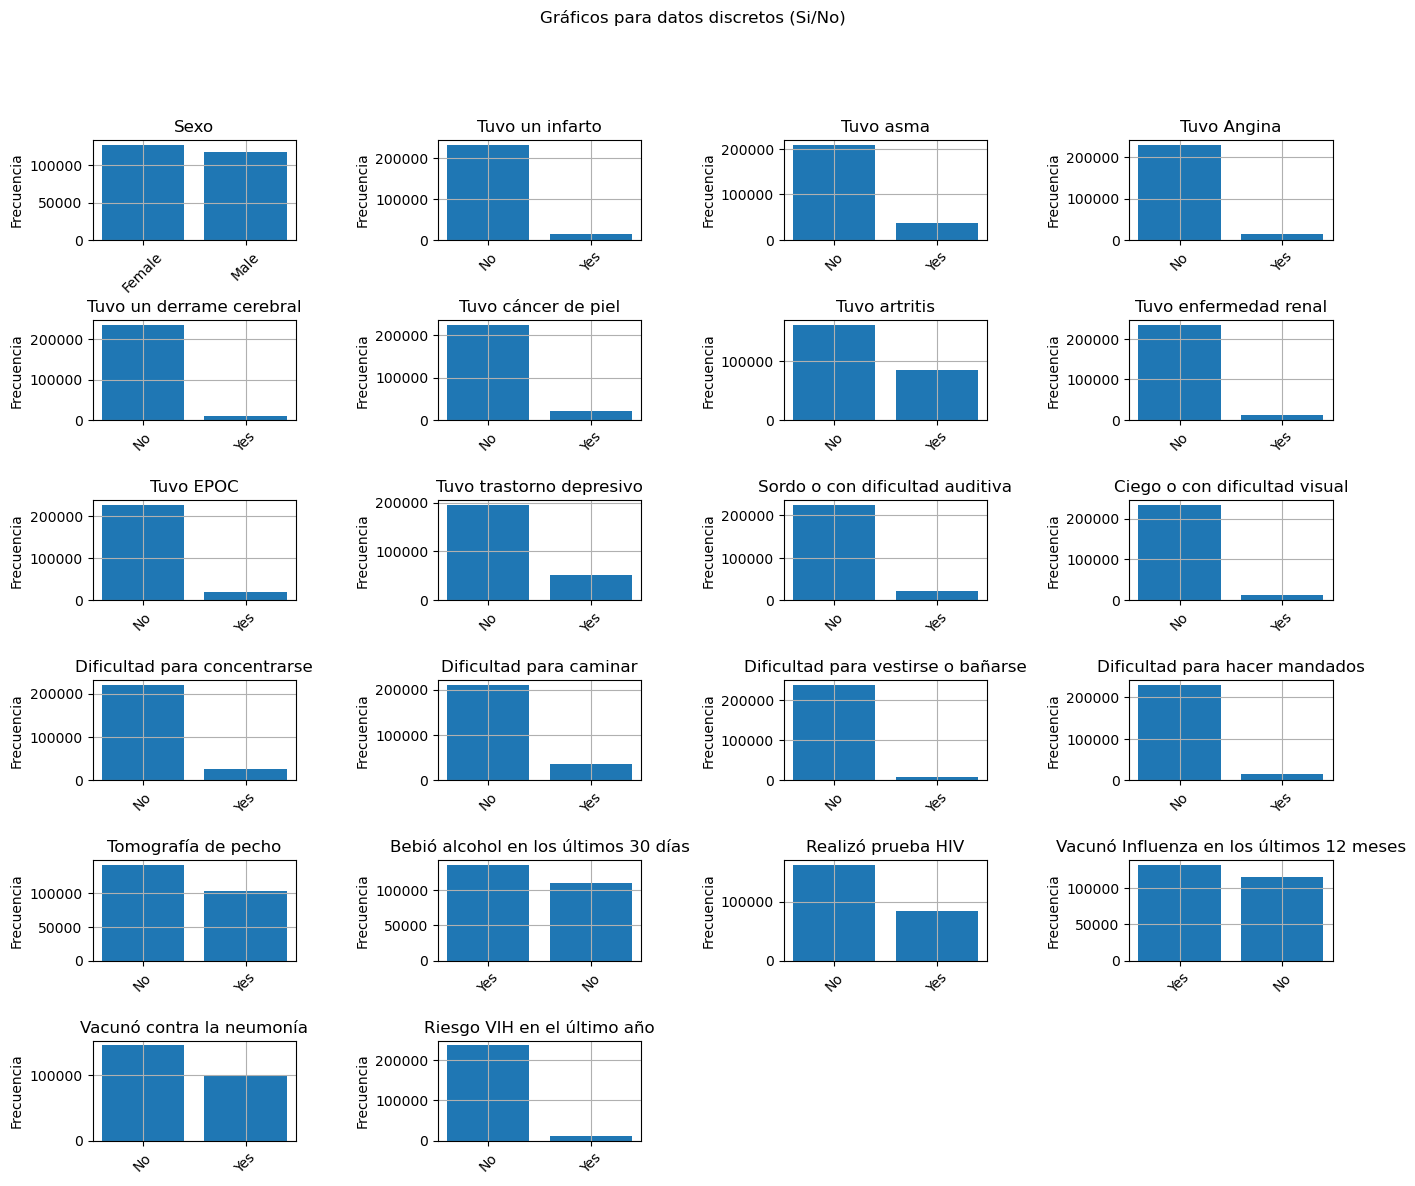

In [116]:
# @title
import matplotlib.pyplot as plt
from tabulate import tabulate

def bar_plot_grid(variables):
    plt.figure(figsize=(16, 13))  # Ajustar el tamaño de la figura
    plt.suptitle('Gráficos para datos discretos (Si/No)')

    traduccion = {
        "Sex": "Sexo",
        "HadHeartAttack": "Tuvo un infarto",
        "HadAsthma": "Tuvo asma",
        'HadAngina': 'Tuvo Angina',
        "HadStroke": "Tuvo un derrame cerebral",
        "HadSkinCancer": "Tuvo cáncer de piel",
        "HadArthritis": "Tuvo artritis",
        'HadKidneyDisease': 'Tuvo enfermedad renal',
        "HadCOPD": "Tuvo EPOC",
        "HadDepressiveDisorder": "Tuvo trastorno depresivo",
        "DeafOrHardOfHearing": "Sordo o con dificultad auditiva",
        "BlindOrVisionDifficulty": "Ciego o con dificultad visual",
        'DifficultyConcentrating': 'Dificultad para concentrarse',
        "DifficultyWalking": "Dificultad para caminar",
        "DifficultyDressingBathing": "Dificultad para vestirse o bañarse",
        'DifficultyErrands': 'Dificultad para hacer mandados',
        'ChestScan': 'Tomografía de pecho',
        "AlcoholDrinkers": "Bebió alcohol en los últimos 30 días",
        "HIVTesting": "Realizó prueba HIV",
        'FluVaxLast12': 'Vacunó Influenza en los últimos 12 meses',
        "PneumoVaxEver": "Vacunó contra la neumonía",
        'HighRiskLastYear': 'Riesgo VIH en el último año',
    }

    for i, variable in enumerate(variables):
        var = df[variable]
        varValue = var.value_counts()

        # Crear subgráfico
        plt.subplot(6, 4, i+1)  # 3 filas, 4 columnas, posición i+1
        plt.bar(varValue.index, varValue)
        plt.xticks(varValue.index, varValue.index.values, rotation=45)
        plt.title(traduccion[variable])
        plt.grid(True)  # Agregar líneas de la cuadrícula
        plt.ylabel("Frecuencia")  # Traducir etiqueta

    plt.subplots_adjust(hspace=0.8, wspace=0.7)  # Ajustar espacio entre subgráficos
    plt.show()

category1 = ['Sex', 'HadHeartAttack','HadAsthma','HadAngina', 'HadStroke','HadSkinCancer', 'HadArthritis', 'HadKidneyDisease', 'HadCOPD',
             'HadDepressiveDisorder', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
             'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'ChestScan',
             'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'HighRiskLastYear']

bar_plot_grid(category1)


A partir de las gráficas de frecuencia para los datos discretos podemos ver algunos que tienen casi la misma cantidad de datos en las dos opciones (Yes/No). Por otro lado vemos algunas que tienen una diferencia significativa,es importante denotar esto, porque más adelante permitira identificar que atributos necesitan de un balanceo de datos.

###Datos númericos continuos

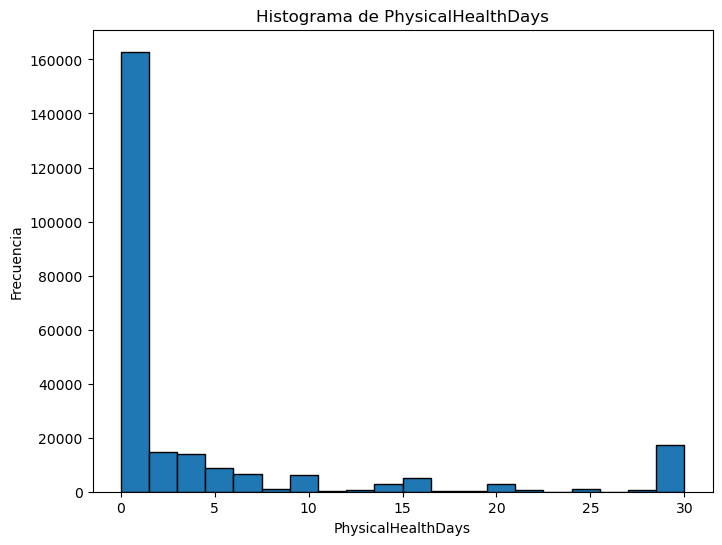

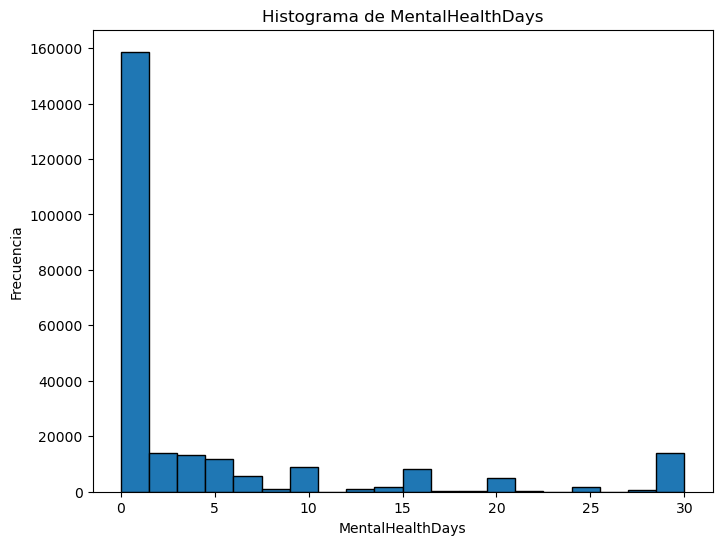

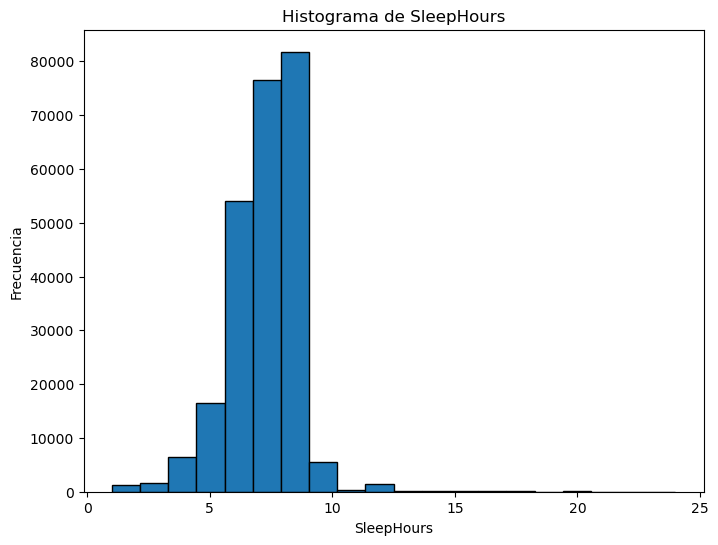

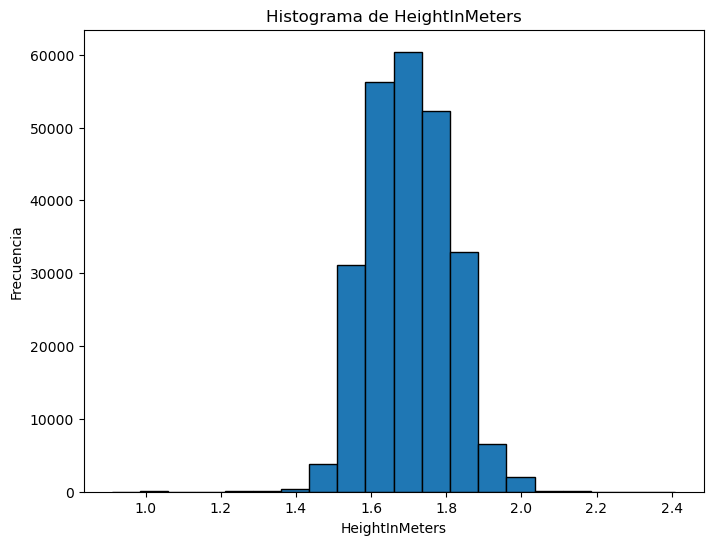

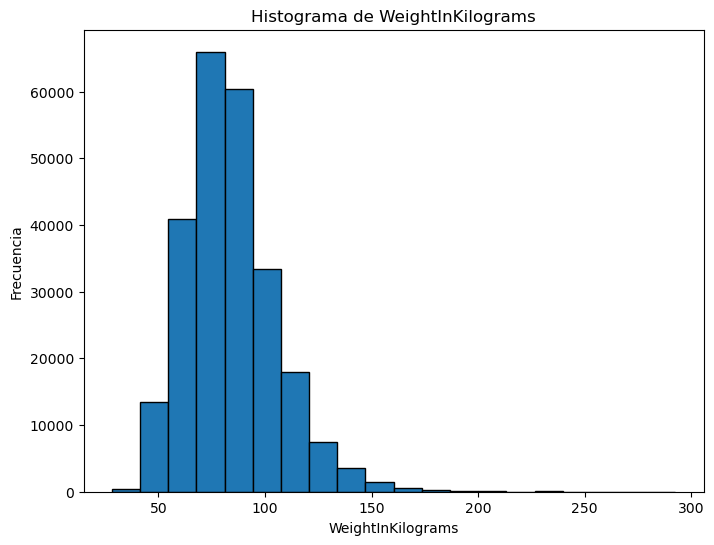

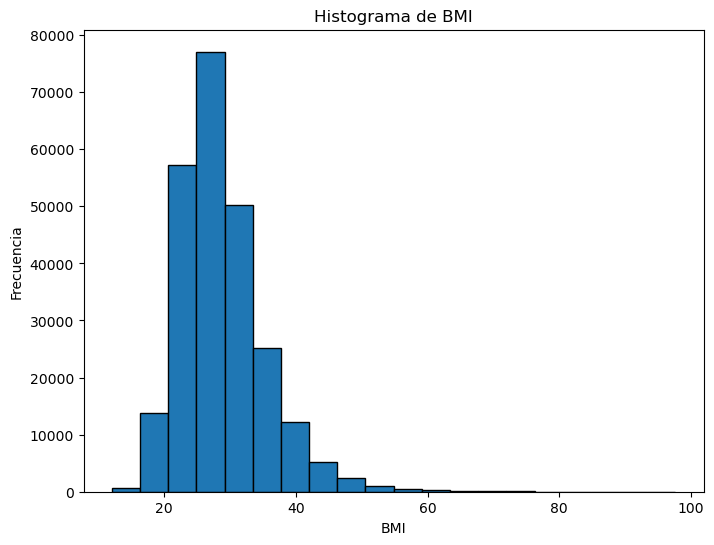

In [120]:
# Histogramas de datos continuos

# Histogramas de frecuencia para datos continuos
continuous_variables = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'WeightInKilograms', 'BMI']

for variable in continuous_variables:

  plt.figure(figsize=(8, 6))
  plt.hist(df[variable], bins=20, edgecolor='black')
  plt.title(f'Histograma de {variable}')
  plt.xlabel(variable)
  plt.ylabel('Frecuencia')
  plt.show()



Casi todos los histogramas exceptuando el histograma de estatura (HeightInMeters), se encuentran sesgado a la derecha, pero teniendo en cuenta el contexto del problema y el significado de cada atributo, combran sentido en el análisis.

##Preprocesamiento

---



### **Librerias**

In [125]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from scipy import stats
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [127]:
# prompt: reasigna al df una cantidad de atributos especificos

# Define the list of attributes you want to keep
atributos = ['Sex','GeneralHealth','PhysicalHealthDays','MentalHealthDays',
  'PhysicalActivities','SleepHours','RemovedTeeth','HadHeartAttack',
  'HadAngina','HadStroke','HadAsthma','HadSkinCancer','HadCOPD',
  'HadDepressiveDisorder','HadKidneyDisease','HadArthritis',
  'HadDiabetes','DifficultyConcentrating','DifficultyWalking',
  'SmokerStatus','ChestScan','AgeCategory','HeightInMeters',
  'WeightInKilograms','BMI','AlcoholDrinkers','FluVaxLast12',
  'PneumoVaxEver','TetanusLast10Tdap','CovidPos']

# Reassign df with only the specified attributes
df = df[atributos]

# Print the updated dataframe
df

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,...,ChestScan,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,CovidPos
0,Female,Very good,4.0,0.0,Yes,9.0,None of them,No,No,No,...,No,Age 65 to 69,1.60,71.67,27.99,No,Yes,Yes,"Yes, received Tdap",No
1,Male,Very good,0.0,0.0,Yes,6.0,None of them,No,No,No,...,No,Age 70 to 74,1.78,95.25,30.13,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No
2,Male,Very good,0.0,0.0,No,8.0,"6 or more, but not all",No,No,No,...,Yes,Age 75 to 79,1.85,108.86,31.66,Yes,No,Yes,"No, did not receive any tetanus shot in the pa...",Yes
3,Female,Fair,5.0,0.0,Yes,9.0,None of them,No,No,No,...,No,Age 80 or older,1.70,90.72,31.32,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",Yes
4,Female,Good,3.0,15.0,Yes,5.0,1 to 5,No,No,No,...,No,Age 80 or older,1.55,79.38,33.07,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,Male,Very good,0.0,0.0,Yes,6.0,None of them,No,No,No,...,No,Age 60 to 64,1.78,102.06,32.28,Yes,No,No,"Yes, received tetanus shot but not sure what type",No
246018,Female,Fair,0.0,7.0,Yes,7.0,None of them,No,No,No,...,No,Age 25 to 29,1.93,90.72,24.34,No,No,No,"No, did not receive any tetanus shot in the pa...",Yes
246019,Male,Good,0.0,15.0,Yes,7.0,1 to 5,No,No,Yes,...,No,Age 65 to 69,1.68,83.91,29.86,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",Yes
246020,Female,Excellent,2.0,2.0,Yes,7.0,None of them,No,No,No,...,No,Age 50 to 54,1.70,83.01,28.66,No,Yes,No,"Yes, received tetanus shot but not sure what type",No


###**Transformación datos categóricos nominales**





In [129]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Atributos con datos nominales
nominal_columns = ['Sex', 'PhysicalActivities', 'RemovedTeeth', 'HadAngina', 'HadStroke',
                  'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
                  'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DifficultyConcentrating',
                  'DifficultyWalking', 'SmokerStatus', 'ChestScan', 'AlcoholDrinkers', 
                  'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'CovidPos']

# OneHotEncoder para las columnas categóricas nominales
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Aplicar OneHotEncoder
encoded_data = encoder.fit_transform(df[nominal_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nominal_columns))

# Concatenar los datos codificados con los originales
df_one_hot = pd.concat([df.drop(nominal_columns, axis=1), encoded_df], axis=1)

print(df_one_hot.head())

  GeneralHealth  PhysicalHealthDays  MentalHealthDays  SleepHours  \
0     Very good                 4.0               0.0         9.0   
1     Very good                 0.0               0.0         6.0   
2     Very good                 0.0               0.0         8.0   
3          Fair                 5.0               0.0         9.0   
4          Good                 3.0              15.0         5.0   

  HadHeartAttack      AgeCategory  HeightInMeters  WeightInKilograms    BMI  \
0             No     Age 65 to 69            1.60              71.67  27.99   
1             No     Age 70 to 74            1.78              95.25  30.13   
2             No     Age 75 to 79            1.85             108.86  31.66   
3             No  Age 80 or older            1.70              90.72  31.32   
4             No  Age 80 or older            1.55              79.38  33.07   

   Sex_Female  ...  FluVaxLast12_Yes  PneumoVaxEver_No  PneumoVaxEver_Yes  \
0         1.0  ...               

In [133]:
# LabelEncoder para las columnas 'GeneralHealth' y 'AgeCategory'
le_general_health = LabelEncoder()
le_age_category = LabelEncoder()

df_codificado = df_one_hot.copy()
df_codificado['GeneralHealth'] = le_general_health.fit_transform(df_codificado['GeneralHealth'])
df_codificado['AgeCategory'] = le_age_category.fit_transform(df_codificado['AgeCategory'])

# Crear diccionarios para almacenar las transformaciones (opcional, para referencia)
general_health_dict = dict(zip(le_general_health.classes_, le_general_health.transform(le_general_health.classes_)))
age_category_dict = dict(zip(le_age_category.classes_, le_age_category.transform(le_age_category.classes_)))

print("Diccionario para GeneralHealth:")
print(general_health_dict)
print("\nDiccionario para AgeCategory:")
print(age_category_dict)

Diccionario para GeneralHealth:
{'Excellent': 0, 'Fair': 1, 'Good': 2, 'Poor': 3, 'Very good': 4}

Diccionario para AgeCategory:
{'Age 18 to 24': 0, 'Age 25 to 29': 1, 'Age 30 to 34': 2, 'Age 35 to 39': 3, 'Age 40 to 44': 4, 'Age 45 to 49': 5, 'Age 50 to 54': 6, 'Age 55 to 59': 7, 'Age 60 to 64': 8, 'Age 65 to 69': 9, 'Age 70 to 74': 10, 'Age 75 to 79': 11, 'Age 80 or older': 12}


In [135]:
#Transformación del atributo objetivo
label_encoder = LabelEncoder()

df_codificado['HadHeartAttack'] = label_encoder.fit_transform(df['HadHeartAttack'])

print(df_codificado['HadHeartAttack'])

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int32


###**Transformación datos categóricos ordinales**

In [137]:
df_codificado.head()

,GeneralHealth,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,AgeCategory,HeightInMeters,WeightInKilograms,BMI,Sex_Female,...,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,4,4.0,0.0,9.0,0,9,1.60,71.67,27.99,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4,0.0,0.0,6.0,0,10,1.78,95.25,30.13,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,4,0.0,0.0,8.0,0,11,1.85,108.86,31.66,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,5.0,0.0,9.0,0,12,1.70,90.72,31.32,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2,3.0,15.0,5.0,0,12,1.55,79.38,33.07,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [139]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 60 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   GeneralHealth                                                                246022 non-null  int32  
 1   PhysicalHealthDays                                                           246022 non-null  float64
 2   MentalHealthDays                                                             246022 non-null  float64
 3   SleepHours                                                                   246022 non-null  float64
 4   HadHeartAttack                                                               246022 non-null  int32  
 5   AgeCategory                                                                  246022 non-null  int32  
 6   HeightInMeters              

###**Correlaciones**

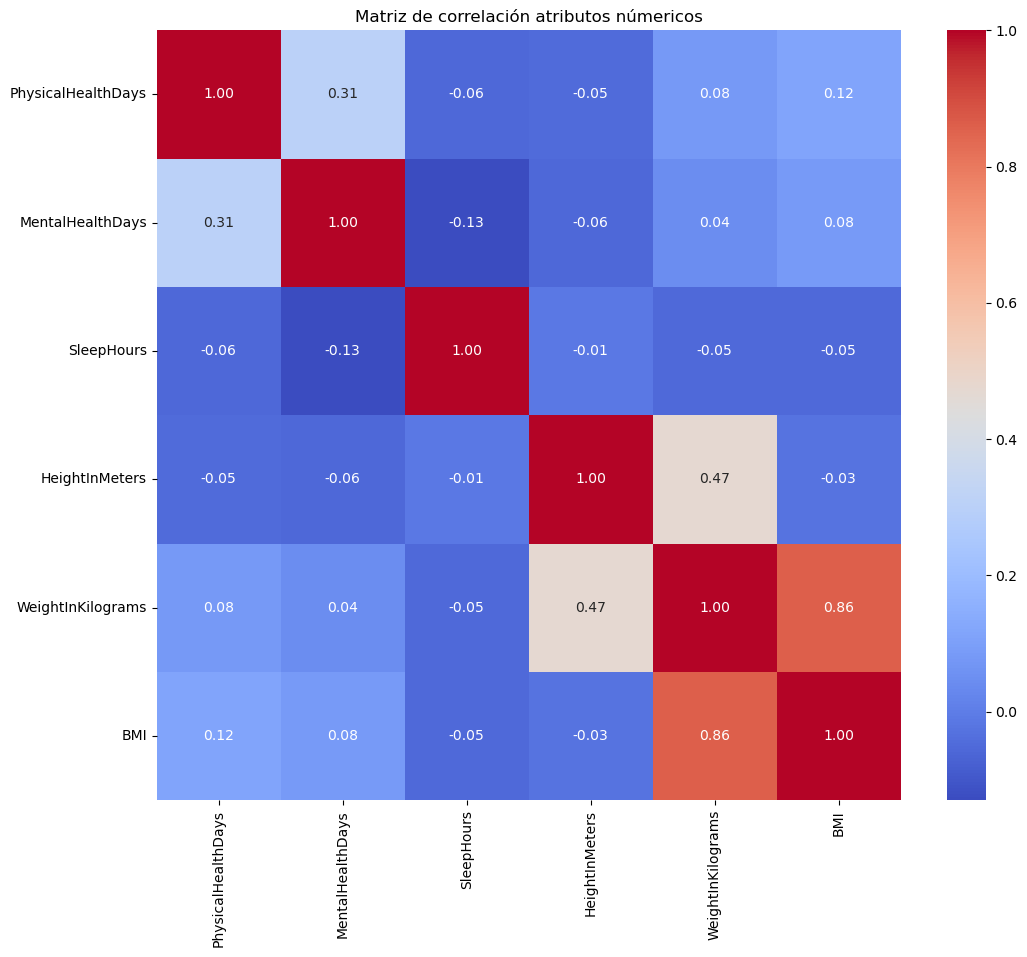

In [57]:
# Correlación atributos númericos

import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = df.select_dtypes(include=['number'])

correlation_matrix = numerical_features.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación atributos númericos')
plt.show()

Tras realizar la matriz de correlación para atributos númericos, se encuentra una relación clara entre los atributos de  Peso con el BMI, Peso(WeightInKilograms) con la altura (HeightInMeters) y una relación leve entre los días de salud mental (MentalHealthDays) con los días de salud física (PhysicalHealthDays).



###**Correlación atributos categóricos**

In [61]:
from IPython.display import Image
Image(filename='Matriz_categoricos.png')


FileNotFoundError: [Errno 2] No such file or directory: 'Matriz_categoricos.png'

La matriz de correlación de datos categóricos contiene 34 atributos de cada lado,para evitar saturar de información y facilitar su comprensión se filtro por un límite de 0,4, donde todas las correlaciones mayores al límite pueden considerarse relevantes para el análisis.

Las correlaciones obtenidas fueron:
* Salud general y dificultad para caminar.
* Tuvo un ataque cardíaco (HadHeartAttack) *texto en cursiva*y tuvo Angina (HadAngina).
* Dificultad para hacer mandados (DifficultyErrands) y dificultad para vestirse o bañarse (DifficultyDressingBathing)
* La edad (AgeCategory) y si alguna vez recibió una vacuna contra la neumonía (PneumoVaxEver).



**Angina:** Es una condición médica que se caracteriza por un dolor o molestia en el pecho.Se produce cuando el corazón no recibe suficiente oxígeno, lo que puede deberse a una reducción del flujo sanguíneo hacia el corazón.

##**Normalización**

Escalamos los datos a partir del algoritmo ***MinMaxScale*** para que queden en una escala de 0-1 y evitar el desbalance en los datos.

In [66]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_codificado[df_codificado.select_dtypes(include=['number']).columns] = scaler.fit_transform(
    df_codificado.select_dtypes(include=['number'])
)

print(df_codificado.head())

   GeneralHealth  PhysicalHealthDays  MentalHealthDays  SleepHours  \
0           1.00            0.133333               0.0    0.347826   
1           1.00            0.000000               0.0    0.217391   
2           1.00            0.000000               0.0    0.304348   
3           0.25            0.166667               0.0    0.347826   
4           0.50            0.100000               0.5    0.173913   

   HadHeartAttack  AgeCategory  HeightInMeters  WeightInKilograms       BMI  \
0             0.0     0.750000        0.460000           0.164681  0.186500   
1             0.0     0.833333        0.580000           0.253848  0.211491   
2             0.0     0.916667        0.626667           0.305313  0.229359   
3             0.0     1.000000        0.526667           0.236718  0.225388   
4             0.0     1.000000        0.426667           0.193836  0.245825   

   Sex_Female  ...  FluVaxLast12_Yes  PneumoVaxEver_No  PneumoVaxEver_Yes  \
0         1.0  ...         

In [68]:
df_codificado.head()



,GeneralHealth,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,AgeCategory,HeightInMeters,WeightInKilograms,BMI,Sex_Female,...,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,1.00,0.133333,0.0,0.347826,0.0,0.750000,0.460000,0.164681,0.186500,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.00,0.000000,0.0,0.217391,0.0,0.833333,0.580000,0.253848,0.211491,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.00,0.000000,0.0,0.304348,0.0,0.916667,0.626667,0.305313,0.229359,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.166667,0.0,0.347826,0.0,1.000000,0.526667,0.236718,0.225388,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.100000,0.5,0.173913,0.0,1.000000,0.426667,0.193836,0.245825,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [70]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 60 columns):
 #   Column                                                                       Non-Null Count   Dtype  
---  ------                                                                       --------------   -----  
 0   GeneralHealth                                                                246022 non-null  float64
 1   PhysicalHealthDays                                                           246022 non-null  float64
 2   MentalHealthDays                                                             246022 non-null  float64
 3   SleepHours                                                                   246022 non-null  float64
 4   HadHeartAttack                                                               246022 non-null  float64
 5   AgeCategory                                                                  246022 non-null  float64
 6   HeightInMeters              

##**Implementación modelo**

Determinar los valores de X y y, se identifica la columna 'HadHeartAttack' como la variable dependiente (y), que es lo que el modelo intentará predecir.Esta es la variable objetivo para el modelo.

In [74]:
from sklearn.model_selection import train_test_split

if 'HadHeartAttack' in df_codificado.columns:
    X = df_codificado.drop('HadHeartAttack', axis=1)
else:
    print(f"Available columns: {df_codificado.columns.tolist()}")

y = df_codificado['HadHeartAttack']

In [76]:
# prompt: elimina valores nan

# Eliminar filas con valores NaN en el DataFrame df_codificado
df_codificado = df_codificado.dropna()

# Verificar si se eliminaron filas con valores NaN
print(df_codificado.isnull().sum())

GeneralHealth                                                                  0
PhysicalHealthDays                                                             0
MentalHealthDays                                                               0
SleepHours                                                                     0
HadHeartAttack                                                                 0
AgeCategory                                                                    0
HeightInMeters                                                                 0
WeightInKilograms                                                              0
BMI                                                                            0
Sex_Female                                                                     0
Sex_Male                                                                       0
PhysicalActivities_No                                                          0
PhysicalActivities_Yes      

Implementación del algoritmo ***SMOTE*** para balancear los atributos con diferencias significativas en sus datos.

In [79]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df_codificado.drop('HadHeartAttack', axis=1)
y = df_codificado['HadHeartAttack']
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X.head()
X_resampled.head()


,GeneralHealth,PhysicalHealthDays,MentalHealthDays,SleepHours,AgeCategory,HeightInMeters,WeightInKilograms,BMI,Sex_Female,Sex_Male,...,FluVaxLast12_Yes,PneumoVaxEver_No,PneumoVaxEver_Yes,"TetanusLast10Tdap_No, did not receive any tetanus shot in the past 10 years","TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",CovidPos_No,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
0,1.00,0.133333,0.0,0.347826,0.750000,0.460000,0.164681,0.186500,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.00,0.000000,0.0,0.217391,0.833333,0.580000,0.253848,0.211491,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.00,0.000000,0.0,0.304348,0.916667,0.626667,0.305313,0.229359,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.25,0.166667,0.0,0.347826,1.000000,0.526667,0.236718,0.225388,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.50,0.100000,0.5,0.173913,1.000000,0.426667,0.193836,0.245825,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


Dividimos el set de datos en un 80% para entrenamiento y un 20 % para prueba.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

###**Algoritmo Random Forest**

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fijar el número de árboles a 300 y sin límite de profundidad (max_depth=None)
n_estimators_optimo = 300
max_depth_optimo = None  # Sin límite de profundidad

# Crear el modelo con n_estimators fijo y max_depth=None
best_model = RandomForestRegressor(n_estimators=n_estimators_optimo, max_depth=max_depth_optimo, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
best_model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = best_model.predict(X_test)

# Calcular las métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)
print("Random Forest Regressor entrenado con 300 árboles y max_depth=None")


Mean Squared Error (MSE): 0.022301525088915638
R-squared (R2): 0.9107921755666151
Random Forest Regressor entrenado con 300 árboles y max_depth=None


### **Obtención de los hiperparametros (GridSearchCV)**

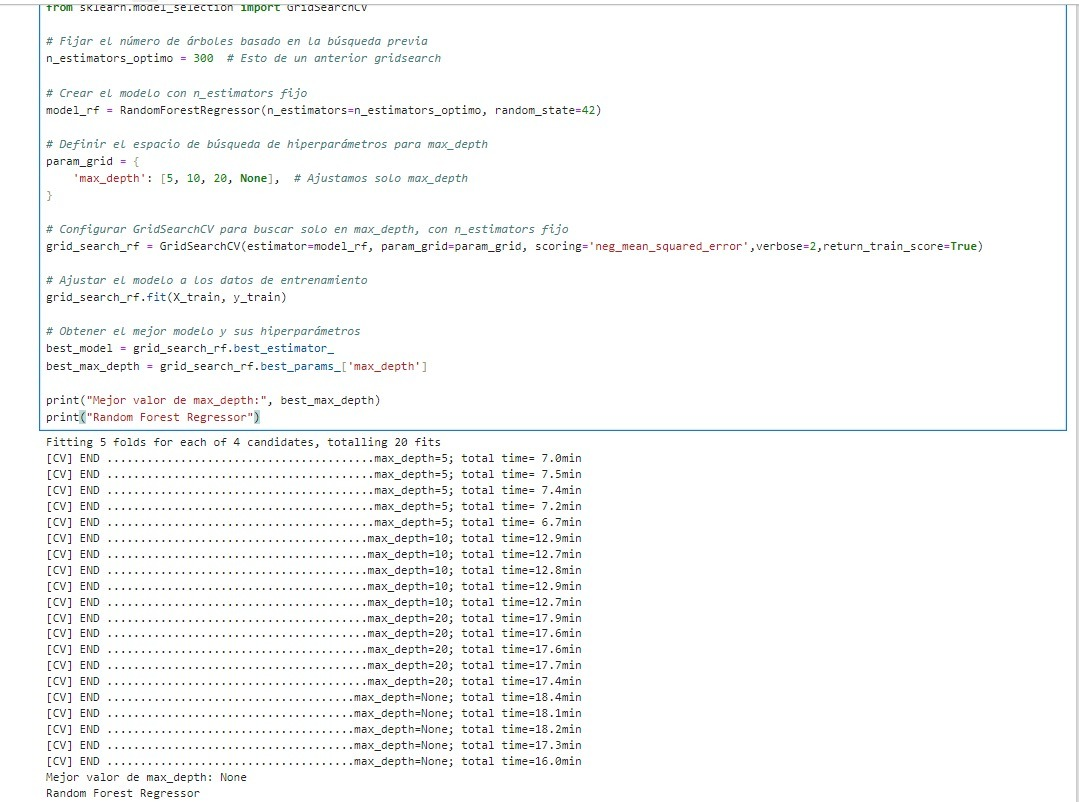

In [179]:
from IPython.display import Image
Image(filename='Obtención-del-mejor-numero-de-profundidad.jpg')

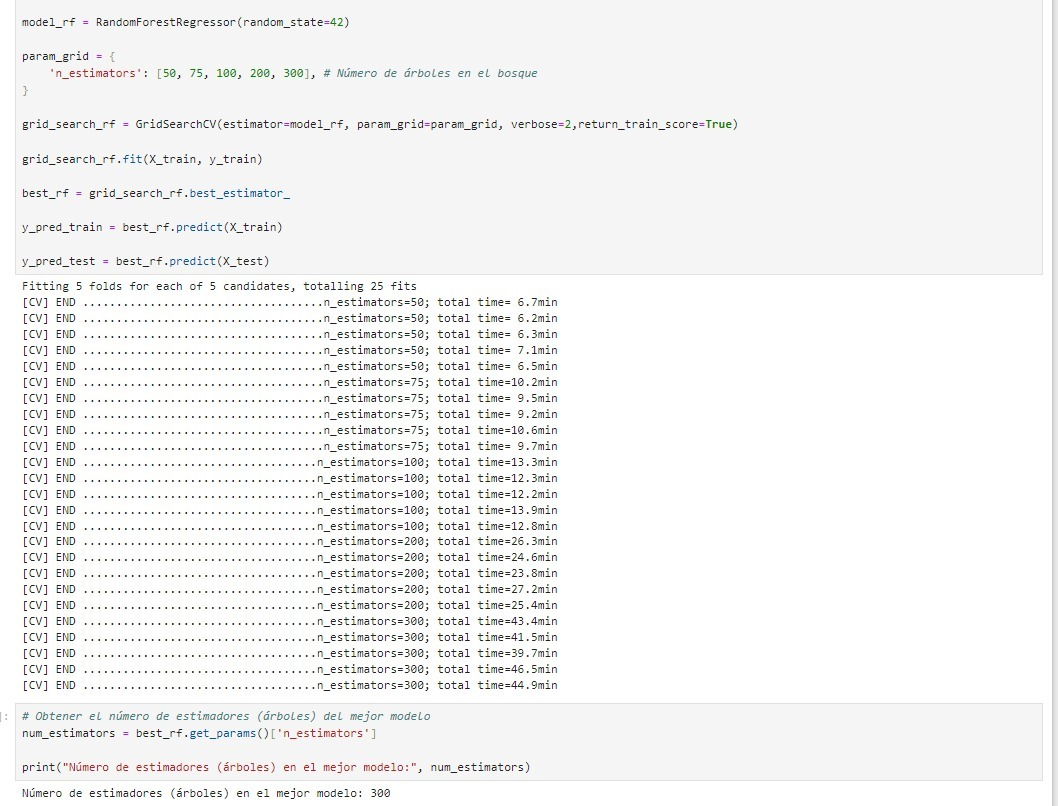

In [181]:
from IPython.display import Image

Image(filename='Obtención-del-mejor-numero-de-arboles.jpg')

Se obtuvieron estos dos hiper parametros los cual se consideraron de mayor importancia entrenar, los otros hiper parametros se decidieron dejar en valores default

### **Predicciones**

In [149]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Datos de entrenamiento
y_pred_train = best_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Datos de prueba
y_pred_test = best_model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Resultados en el conjunto de entrenamiento
print("Random Forest Regressor (Entrenamiento)")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

# Resultados en el conjunto de prueba
print("\nRandom Forest Regressor (Prueba)")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)



Random Forest Regressor (Entrenamiento)
Mean Squared Error: 0.0030877022914224304
Mean Absolute Error: 0.019984865038268473
R-squared: 0.9876491759155691

Random Forest Regressor (Prueba)
Mean Squared Error: 0.022301525088915638
Mean Absolute Error: 0.0539564601477
R-squared: 0.9107921755666151



### **Métricas de evaluación**



In [151]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import numpy as np

# Convertir las predicciones de regresión en clases (binarias) para el conjunto de entrenamiento
threshold = np.median(y_train)

y_pred_train_classes = (y_pred_train >= threshold).astype(int)
y_train_classes = (y_train >= threshold).astype(int)

# Convertir las predicciones de regresión en clases (binarias) para el conjunto de prueba
y_pred_test_classes = (y_pred_test >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)

# Informe de clasificación para el conjunto de entrenamiento
train_report = classification_report(y_train_classes, y_pred_train_classes, target_names=["No", "Yes"], output_dict=False)

# Informe de clasificación para el conjunto de prueba
test_report = classification_report(y_test_classes, y_pred_test_classes, target_names=["No", "Yes"], output_dict=False)

# Imprimir informes de clasificación
print("\nInforme de Clasificación - Conjunto de Entrenamiento:")
print(train_report)

print("\nInforme de Clasificación - Conjunto de Prueba:")
print(test_report)



Informe de Clasificación - Conjunto de Entrenamiento:
              precision    recall  f1-score   support

          No       0.79      1.00      0.88    185865
         Yes       1.00      0.73      0.85    186274

    accuracy                           0.87    372139
   macro avg       0.89      0.87      0.86    372139
weighted avg       0.89      0.87      0.86    372139


Informe de Clasificación - Conjunto de Prueba:
              precision    recall  f1-score   support

          No       0.76      1.00      0.86     46722
         Yes       1.00      0.67      0.81     46313

    accuracy                           0.84     93035
   macro avg       0.88      0.84      0.83     93035
weighted avg       0.88      0.84      0.83     93035



**Resultado:** Se obtuvo una precisión del **85,5%** en promedio.

Comparación entre datos reales y datos predichos.

### **Atributos con mayor relevancia**

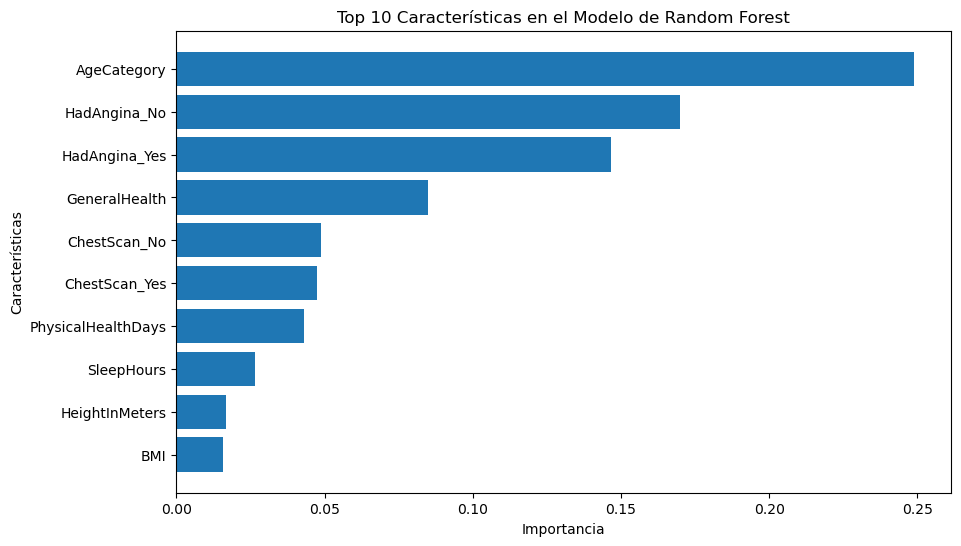

In [155]:
# Obtener la importancia de las características
importancia_caracteristicas = best_model.feature_importances_

nombres_caracteristicas = X_train.columns

indices_ordenados = np.argsort(importancia_caracteristicas)[::-1]

indices_ordenados = indices_ordenados[:10]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices_ordenados)), importancia_caracteristicas[indices_ordenados], align='center')
plt.yticks(range(len(indices_ordenados)), [nombres_caracteristicas[i] for i in indices_ordenados])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Top 10 Características en el Modelo de Random Forest')
plt.gca().invert_yaxis()
plt.show()

Los atributos que resultaron ser relevantes para la solución del problema, tomando como variable objetivo 'HadHeartAttack' fueron 'AgeCategory', 'Had_Angina','GeneralHealth', entre otras.

## **Conclusión**

El modelo cuenta con una buena precisión tanto para la posibilidad de que si se tenga un ataque cardiaco, como para el caso contrario, por lo cual nos da una predicción un poco confiable.


Algoritmos utilizados:
- MinMax Scaler
- SMOTE balanceo de datos.
- Random Forest Regressor.
- GridSearchCV

Se obtuvó una precisión del **85,5% en promedio** lo cual nos indica una gran efectividad del modelo a la hora de predecir probabilidades de ataque cardiacos,además se vió un error absoluto medio de **5,39%** lo cual nos muestra que el promedio de desviación tiende a estar en ese rango porcentual, en general se observa un modelo bien entrenado y preciso para una predicción general de este riesgo.

Codigos para descargar el modelo y los encoders

In [160]:
import pickle
with open('best_model.pkl', 'wb') as archivo:
    pickle.dump(best_model, archivo)

In [161]:
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

with open('le_general_health.pkl', 'wb') as f:
    pickle.dump(le_general_health, f)

with open('le_age_category.pkl', 'wb') as f:
    pickle.dump(le_age_category, f)

In [ ]:
!pip3 freeze > requirements.txt

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f2134c7b-ae88-4e04-ae3b-65f8fdd04332' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>